In [55]:
import numpy as np
import pandas as pd
import plotly

# 1. Simple Setting
- 10 investment strategies: randomly assign to people

In [1]:
def simulate_society(num_people, interest_rate, scaling_factor, iteration_time):
    # Initialize the society
    m = 100.0  # Starting money for each person
    wealth = np.full(num_people, m)  # Initial wealth for all people

    # Generate random investment strategy type for each person (0 for conservative, 1 for moderate, 2 for aggressive)
    investment_strategy = np.random.randint(0, 10, num_people)

    # Assign investment ratio based on strategy type
    strategies = {
        0: {"name": "s1", "ratio": 0},
        1: {"name": "s2", "ratio": 0.1},
        2: {"name": "s3", "ratio": 0.2},
        3: {"name": "s4", "ratio": 0.3},
        4: {"name": "s5", "ratio": 0.4},
        5: {"name": "s6", "ratio": 0.5},
        6: {"name": "s7", "ratio": 0.6},
        7: {"name": "s8", "ratio": 0.7},
        8: {"name": "s9", "ratio": 0.8},
        9: {"name": "s10", "ratio": 0.9},
        10: {"name": "s11", "ratio": 1}

    }

    investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

    # Lists to store wealth distribution after each round
    wealth_distribution = [wealth.copy()]

    # Run simulation for 'iteration_time' rounds
    for _ in range(iteration_time):
        # Calculate investment and consumption amount for each person
        investment_amount = investment_ratio * wealth

        total_consumption = np.sum((1 - investment_ratio) * wealth)
        consumption_amount = np.full(num_people, total_consumption / num_people)

        # Simulate investment and update wealth
        investment_returns = np.random.normal(interest_rate, scaling_factor * interest_rate, num_people)
        wealth += investment_amount * investment_returns

        # Calculate consumption and update wealth
        wealth -= investment_amount
        wealth += consumption_amount

        # Ensure wealth is non-negative
        wealth = np.maximum(wealth, 0)

        # Store the wealth distribution after each round
        wealth_distribution.append(wealth.copy())

    return wealth_distribution

In [6]:
# plot the wealth distribution for each round

def plot_wealth_distribution(wealth_distribution):

    # Create figure
    fig = plotly.graph_objects.Figure()

    # Add traces, one for each slider step
    for wealth in wealth_distribution:
        fig.add_trace(
            plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
        
    # Make 10th trace visible
    fig.data[10].visible = True

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):

        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=10,
        currentvalue={"prefix": "Round: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders,
        width=800,
        height=600,
    )

    fig.show()

# 1.1 scaling_factor = 0.5

In [9]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0.5
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)
plot_wealth_distribution(wealth_distribution)

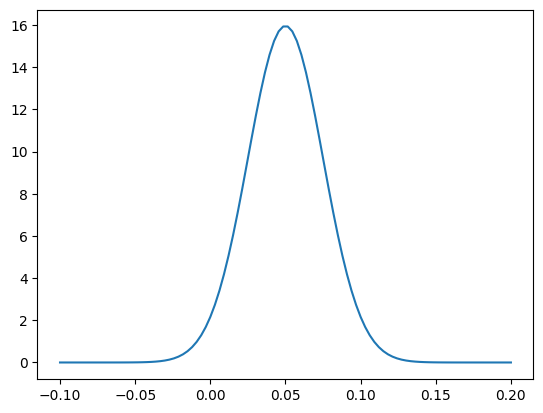

In [10]:
# plot the normal distribution interest return
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-0.1, 0.2, 100)
y = stats.norm.pdf(x, interest_rate,  scaling_factor * interest_rate)
plt.plot(x, y)
plt.show()

# 1.2 scaling_factor = 0 (no risk)

In [11]:
num_people = 100
interest_rate = 0.05
scaling_factor = 0
iteration_time = 100

wealth_distribution = simulate_society(num_people, interest_rate, scaling_factor, iteration_time)
plot_wealth_distribution(wealth_distribution)

# 2. Advanced Model

In [25]:
import numpy as np
import matplotlib.pyplot as plt

class InvestmentSimulation:
    def __init__(self, num_people, interest_rate, scaling_factor, iteration_time):
        self.num_people = num_people
        self.interest_rate = interest_rate
        self.scaling_factor = scaling_factor
        self.iteration_time = iteration_time
        self.wealth_distribution = None

    def assign_investment_types(self):
        # Define the investment strategies
        strategies = [
            {"name": "Conservative", "ratio": 0.1},
            {"name": "Moderate 1", "ratio": 0.2},
            {"name": "Moderate 2", "ratio": 0.3},
            {"name": "Moderate 3", "ratio": 0.4},
            {"name": "Moderate 4", "ratio": 0.5},
            {"name": "Aggressive 1", "ratio": 0.6},
            {"name": "Aggressive 2", "ratio": 0.7},
            {"name": "Aggressive 3", "ratio": 0.8},
            {"name": "Aggressive 4", "ratio": 0.9},
            {"name": "Aggressive 5", "ratio": 1.0},
        ]

        # Calculate the Pareto weights based on strategy ratios
        ratios = np.array([strategy["ratio"] for strategy in strategies])
        weights = 1 / ratios
        pareto_weights = weights / np.sum(weights)

        # Use the Pareto weights to assign investment strategies to individuals
        investment_strategy = np.random.choice(len(strategies), size=self.num_people, p=pareto_weights)
        
        self.investment_ratio = np.array([strategies[strategy]["ratio"] for strategy in investment_strategy])

        return self.investment_ratio

    def simulate_society(self):
        # Initialize the society
        m = 100.0  # Starting money for each person
        wealth = np.full(self.num_people, m)  # Initial wealth for all people

        # Generate investment strategy type for each person using random choice
        investment_ratio = self.assign_investment_types()

        # Lists to store wealth distribution after each round
        wealth_distribution = [wealth.copy()]

        # Run simulation for 'iteration_time' rounds
        for _ in range(self.iteration_time):
            # Calculate total consumption amount for the round
            total_consumption = np.sum((1 - investment_ratio) * wealth)

            # Calculate investment and consumption amount for each person
            investment_amount = investment_ratio * wealth
            consumption_amount = np.full(self.num_people, total_consumption / self.num_people)

            # Simulate investment and update wealth
            investment_returns = np.random.normal(self.interest_rate, self.scaling_factor * self.interest_rate, self.num_people)
            wealth += investment_amount * investment_returns

            # Calculate consumption and update wealth
            wealth -= investment_amount
            wealth += consumption_amount

            # Ensure wealth is non-negative
            wealth = np.maximum(wealth, 0)

            # Store the wealth distribution after each round
            wealth_distribution.append(wealth.copy())

        self.wealth_distribution = wealth_distribution

    def plot_wealth_distribution(self):

        fig = plotly.graph_objects.Figure()

        # Add traces, one for each slider step
        for wealth in self.wealth_distribution:
            fig.add_trace(
                plotly.graph_objects.Histogram(x=wealth, nbinsx=100, histnorm='probability density', visible=False))
            
        # Make 10th trace visible
        fig.data[10].visible = True

        # Create and add slider
        steps = []
        for i in range(len(fig.data)):

            step = dict(
                method="update",
                args=[{"visible": [False] * len(fig.data)},
                    {"title": "Wealth Distribution for Round " + str(i)}],  # layout attribute
            )
            step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
            steps.append(step)

        sliders = [dict(
            active=10,
            currentvalue={"prefix": "Round: "},
            pad={"t": 50},
            steps=steps
        )]

        fig.update_layout(
            sliders=sliders,
            width=800,
            height=600,
        )

        fig.show()


In [52]:
if __name__ == "__main__":
    num_people = 100
    interest_rate = 0.8
    scaling_factor = 0.5
    iteration_time = 100

    simulation = InvestmentSimulation(num_people, interest_rate, scaling_factor, iteration_time)
    simulation.simulate_society()
    simulation.plot_wealth_distribution()

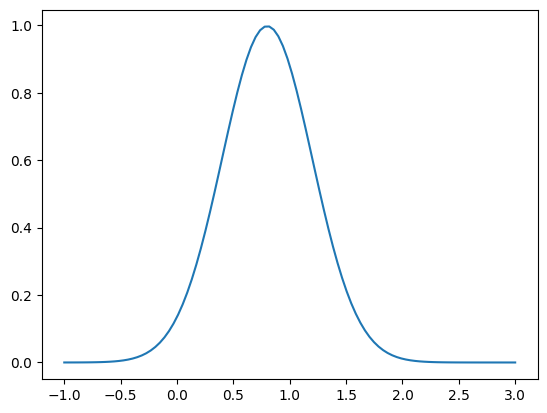

In [44]:
# plot the normal distribution interest return
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-1, 3, 100)
y = stats.norm.pdf(x, interest_rate,  scaling_factor * interest_rate)
plt.plot(x, y)
plt.show()

In [70]:
# sum the wealth by strategy group 
df_strategy = pd.DataFrame(simulation.investment_ratio)
df_wealth = pd.DataFrame(simulation.wealth_distribution).T
df_wealth["strategy"] = df_strategy

In [73]:
df_wealth.groupby('strategy').sum()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
strategy,,,,,,,,,,,,,,,,,,,,,
0.1,2600.0,4197.078711,6713.160435,10759.377790,17007.103416,27103.696914,42935.087510,68097.293003,107830.377722,170121.187672,...,3.201674e+21,5.035005e+21,8.008499e+21,1.263681e+22,1.994466e+22,3.144869e+22,4.974506e+22,7.895483e+22,1.238682e+23,1.943199e+23
0.2,1900.0,3027.150830,4890.408209,7872.943721,12333.574138,19679.898283,31326.613526,48272.414760,74427.803380,118715.254980,...,2.267234e+21,3.573109e+21,5.601761e+21,8.665255e+21,1.350180e+22,2.180256e+22,3.471855e+22,5.473372e+22,8.542109e+22,1.351680e+23
0.3,1100.0,1755.996780,2863.366028,4541.681804,6776.754890,10562.487233,16430.736921,25484.036321,42811.243290,66965.383741,...,1.239870e+21,2.010067e+21,3.172716e+21,5.018409e+21,8.025105e+21,1.245809e+22,1.824063e+22,2.877823e+22,4.697805e+22,7.668824e+22
0.4,1500.0,2370.779910,3781.207540,5901.628980,9004.808224,13669.454322,21610.662820,34529.533487,56399.408204,89427.506641,...,1.783466e+21,2.777639e+21,4.291094e+21,6.966952e+21,1.070276e+22,1.657696e+22,2.710236e+22,4.170530e+22,6.473884e+22,1.069439e+23
0.5,700.0,1170.419211,1862.710689,2505.738539,3888.017681,5944.514278,9538.566062,15998.008164,24762.535660,38971.136906,...,7.843009e+20,1.320666e+21,1.883771e+21,2.823209e+21,4.512167e+21,7.440588e+21,1.152055e+22,1.879594e+22,3.086390e+22,4.829723e+22
0.6,400.0,660.756982,1071.751506,1686.654466,2983.473996,4512.573185,7429.673524,10560.761606,16204.374032,25360.434789,...,4.230624e+20,6.374627e+20,1.096025e+21,1.551343e+21,2.242011e+21,3.731306e+21,5.971836e+21,9.217306e+21,1.470860e+22,3.018952e+22
0.7,400.0,572.566018,946.620171,1322.800133,2010.609686,3032.486130,4569.057234,9168.380756,15087.674382,24710.972396,...,3.526184e+20,4.979347e+20,9.125777e+20,1.700937e+21,2.737175e+21,4.337951e+21,7.477405e+21,1.094053e+22,1.582035e+22,2.212417e+22
0.8,300.0,513.739546,712.886573,1000.612435,1542.747068,2795.000544,4653.451218,6376.368548,9893.293118,14151.421729,...,3.169423e+20,5.584279e+20,8.238239e+20,1.254643e+21,1.896292e+21,2.959462e+21,3.580456e+21,6.760353e+21,1.016847e+22,1.778998e+22
0.9,600.0,962.556143,1437.421969,2190.756344,3502.787997,5150.491169,7274.598519,11454.434202,20107.505574,30380.258526,...,6.778391e+20,1.053344e+21,1.731163e+21,2.623110e+21,4.219168e+21,4.562928e+21,7.457324e+21,1.234757e+22,2.137414e+22,3.692783e+22


In [74]:
strategies = [
            {"name": "Conservative1", "ratio": 0},
            {"name": "Conservative2", "ratio": 0.1},
            {"name": "Moderate 1", "ratio": 0.2},
            {"name": "Moderate 2", "ratio": 0.3},
            {"name": "Moderate 3", "ratio": 0.4},
            {"name": "Moderate 4", "ratio": 0.5},
            {"name": "Moderate 5", "ratio": 0.6},
            {"name": "Moderate 6", "ratio": 0.7},
            {"name": "Aggressive 1", "ratio": 0.8},
            {"name": "Aggressive 2", "ratio": 0.9}
        ]

# Calculate the Pareto weights based on strategy ratios
ratios = np.array([strategy["ratio"] for strategy in strategies])
weights = 1 / ratios
pareto_weights = weights / np.sum(weights)

# Use the Pareto weights to assign investment strategies to individuals
investment_strategy = np.random.choice(len(strategies), num_people, p=pareto_weights)

In [75]:
ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [76]:
weights

array([10.        ,  5.        ,  3.33333333,  2.5       ,  2.        ,
        1.66666667,  1.42857143,  1.25      ,  1.11111111,  1.        ])

In [77]:
pareto_weights

array([0.34141715, 0.17070858, 0.11380572, 0.08535429, 0.06828343,
       0.05690286, 0.04877388, 0.04267714, 0.03793524, 0.03414172])

In [78]:
investment_strategy

array([0, 3, 1, 5, 2, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 2, 0, 0, 0, 8, 6, 3,
       3, 1, 0, 0, 0, 0, 6, 3, 1, 0, 7, 0, 4, 2, 2, 5, 0, 5, 1, 5, 0, 0,
       0, 1, 1, 0, 0, 0, 8, 1, 2, 0, 0, 8, 0, 0, 0, 6, 1, 7, 1, 5, 0, 0,
       7, 2, 1, 0, 0, 0, 5, 0, 5, 9, 0, 3, 0, 0, 5, 0, 0, 1, 1, 0, 4, 2,
       1, 7, 0, 7, 4, 5, 2, 0, 2, 4, 1, 0])